In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('figure',dpi=100);
sns.set(style="whitegrid") # seteando tipo de grid en seaborn


In [2]:
plt.rc('figure',dpi=100);

Text(0,0.5,'Cantidad de postulantes')

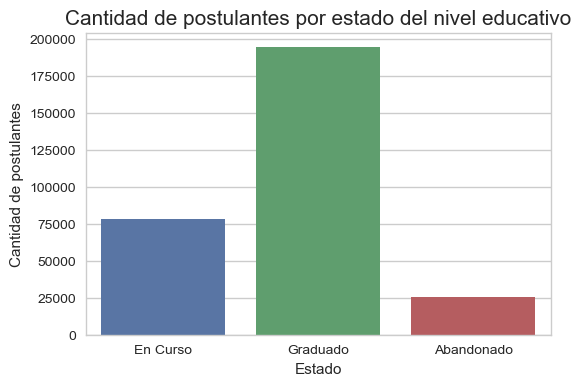

In [4]:
#cargo los datos de la educacion de los postulantes
nivelEd = pd.read_csv("../Data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
g = sns.countplot(nivelEd["estado"])
g.set_title("Cantidad de postulantes por estado del nivel educativo", fontsize=15)
g.set_xlabel("Estado")
g.set_ylabel("Cantidad de postulantes")

Text(0.5,1,'Postulantes por nivel de educación abandonado')

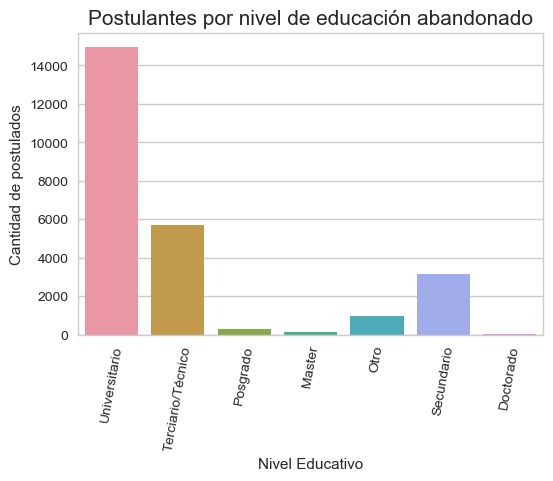

In [5]:
abandonado = nivelEd[nivelEd["estado"] == "Abandonado"]
abandonado.head()
g = sns.countplot(abandonado["nombre"])
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_xlabel("Nivel Educativo")
g.set_ylabel("Cantidad de postulados")
g.set_title("Postulantes por nivel de educación abandonado", fontsize=15)


                   nombre
nombre                   
Doctorado             105
Master               1935
Posgrado             4831
Secundario         103105
Terciario/Técnico   27009
Universitario       38607


Text(0.5,1,'Postulantes por nivel de educación completado')

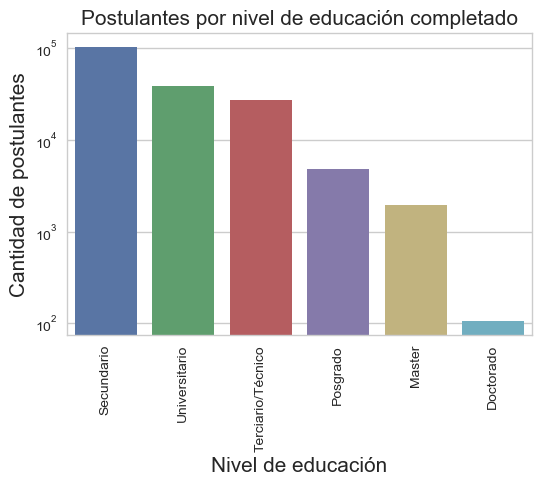

In [6]:
nivelEdCompletado = nivelEd[(nivelEd["estado"] == "Graduado")&(nivelEd["nombre"]!= "Otro")]

#veamos la cantidad de postulantes por grado de educacion completado
cantidadPorEducacionCompletada = nivelEdCompletado.groupby("nombre").agg({"nombre":"count"})
print(cantidadPorEducacionCompletada)
graf = sns.countplot(x='nombre', data=nivelEdCompletado, order=nivelEdCompletado['nombre'].value_counts().index, orient='v')
graf.set_xticklabels(graf.get_xticklabels(),rotation=90)
graf.set_xlabel("Nivel de educación", fontsize=15)
graf.set_ylabel("Cantidad de postulantes", fontsize=15)
graf.set_yscale("log")
graf.set_title("Postulantes por nivel de educación completado", fontsize=15)

                   nombre
nombre                   
Doctorado              94
Master               1519
Otro                 4919
Posgrado             2239
Secundario           3995
Terciario/Técnico   15032
Universitario       50733


Text(0.5,1,'Postulantes por nivel de educación en curso')

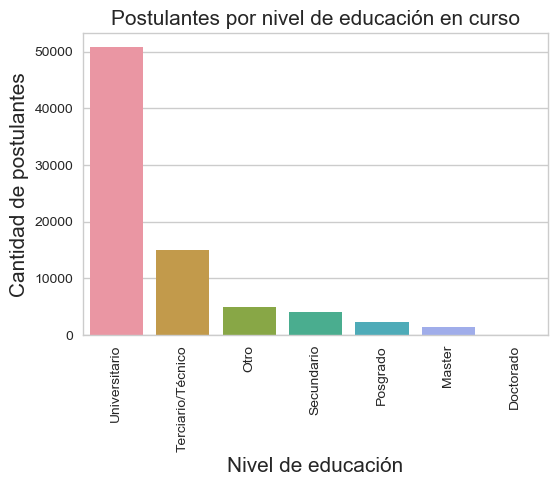

In [7]:
nivelEdEnCurso = nivelEd[nivelEd["estado"] == "En Curso"]

#veamos la cantidad de postulantes por grado de educacion en curso
cantidadPorEducacionEnCurso = nivelEdEnCurso.groupby("nombre").agg({"nombre":"count"})
print(cantidadPorEducacionEnCurso)
graf = sns.countplot(x='nombre', data=nivelEdEnCurso, order=nivelEdEnCurso['nombre'].value_counts().index, orient='v')
graf.set_xticklabels(graf.get_xticklabels(),rotation=90)
graf.set_xlabel("Nivel de educación", fontsize=15)
graf.set_ylabel("Cantidad de postulantes", fontsize=15)
graf.set_title("Postulantes por nivel de educación en curso", fontsize=15)

1    86475
3    33919
2    22246
4     4386
0     3304
5     1916
6      105
Name: gradoMax, dtype: int64


,idpostulante,gradoMax,nombre,nivelEd
0,0z5VvGv,1,Secundario,Secundario
1,0zB026d,2,Terciario/Técnico,Terciario/Técnico
2,0zB03O9,1,Secundario,Secundario
3,0zB08lq,1,Secundario,Secundario
4,0zB0NWY,3,Universitario,Universitario
5,0zB0Xwd,1,Secundario,Secundario
6,0zB0e1d,1,Secundario,Secundario
7,0zB0eDY,2,Terciario/Técnico,Terciario/Técnico
8,0zB0qGE,1,Secundario,Secundario
9,0zB10m8,3,Universitario,Universitario


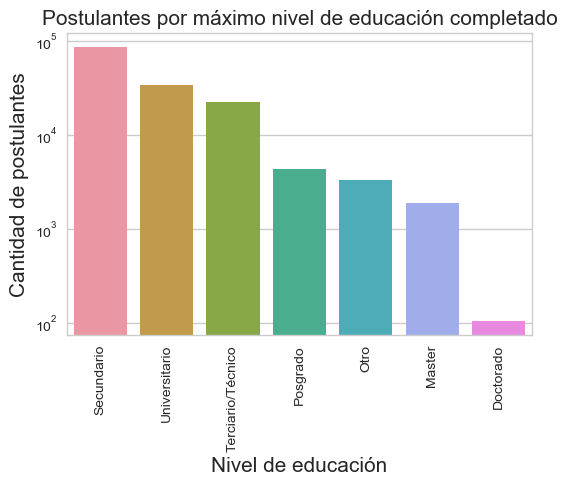

In [8]:
#Esto resulta logico ya que todos los que tienen completado un nivel superior tienen completado el secundario
#Generemos un dataframe con el grado maximo de educacion completada por id
mapGradoEc = {
    "Otro":0,
    "Terciario/Técnico": 2,
    "Secundario":1,
    "Posgrado": 4,
    "Universitario": 3,
    "Master": 5,
    "Doctorado": 6
}

def inverseDic(mapDic):
    newdic = {}
    for key in mapDic.keys():
        value = mapDic[key]
        newdic[value] = key
    return newdic
    
invDic = inverseDic(mapGradoEc)

nivelEd["gradoMax"] = nivelEd["nombre"].map(mapGradoEc)
nivelEdCompletado = nivelEd[nivelEd["estado"] == "Graduado"]


maxNivelEdCompletado = nivelEdCompletado.groupby("idpostulante").agg({"gradoMax":"max"})
print(maxNivelEdCompletado["gradoMax"].value_counts())
maxNivelEdCompletado["nombre"] = maxNivelEdCompletado["gradoMax"].map(invDic)

graf = sns.countplot(maxNivelEdCompletado["nombre"],order=maxNivelEdCompletado['nombre'].value_counts().index, orient='v')
graf.set_xticklabels(graf.get_xticklabels(),rotation=90)
graf.set_xlabel("Nivel de educación", fontsize=15)
graf.set_ylabel("Cantidad de postulantes", fontsize=15)
graf.set_title("Postulantes por máximo nivel de educación completado", fontsize=15)
graf.set_yscale("log")
maxNivelEdCompletado["nivelEd"] = maxNivelEdCompletado["nombre"]
maxNivelEdCompletado.drop("nombre", axis=1)
maxNivelEdCompletado.reset_index(level=0, inplace=True)
maxNivelEdCompletado


In [9]:
avisos = pd.read_csv("../Data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv")
postulaciones = pd.read_csv("../Data/datos_navent_fiuba/fiuba_4_postulaciones.csv")
avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


Text(0.5,1,'Cantidad de avisos por area de trabajo')

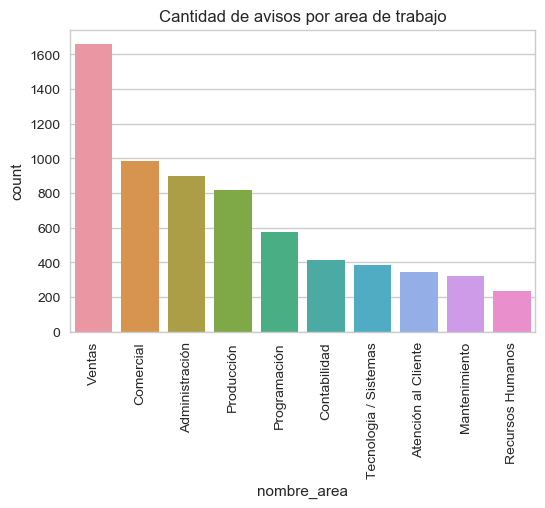

In [10]:
areaAvisos = avisos.loc[:,["idaviso","nombre_area"]]
nivelAvisos = avisos.loc[:,["idaviso","nivel_laboral"]]
#areaAvisos.sort_values
#print(areaAvisos.nombre_area.value_counts())
g = sns.countplot(x= "nombre_area",data = areaAvisos, order = areaAvisos.nombre_area.value_counts().head(10).index , orient='v')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title("Cantidad de avisos por area de trabajo")

,idaviso,idpostulante,fechapostulacion,nombre_area,nombre,estado,gradoMax,abandonoSec
0,1112257047,NM5M,2018-01-15 16:22:34,Atención al Cliente,Secundario,Graduado,1.0,False
1,1111920714,NM5M,2018-02-06 09:04:50,Telemarketing,Secundario,Graduado,1.0,False
2,1112346945,NM5M,2018-02-22 09:04:47,Telemarketing,Secundario,Graduado,1.0,False
3,1112345547,NM5M,2018-02-22 09:04:59,Telemarketing,Secundario,Graduado,1.0,False
4,1112237522,5awk,2018-01-25 18:55:03,Contabilidad,Universitario,Graduado,3.0,False


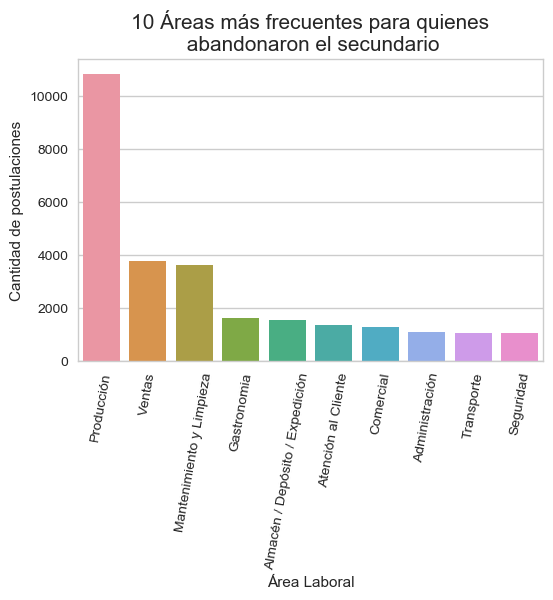

In [11]:
postulaciones = pd.merge(postulaciones,areaAvisos, how="left")
postulaciones = pd.merge(postulaciones,nivelEd, how="left")
postulaciones.head()
postulaciones["abandonoSec"] = (postulaciones["nombre"] == "Secundario")&(postulaciones["estado"] == "Abandonado")
abandonoSec = postulaciones[postulaciones["abandonoSec"]]
abandonoSec.dropna()

areasAbandono = abandonoSec["nombre_area"].value_counts()

g = sns.countplot(x ="nombre_area" ,data = abandonoSec, order = areasAbandono.head(10).index)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_xlabel("Área Laboral")
g.set_ylabel("Cantidad de postulaciones")
g.set_title("10 Áreas más frecuentes para quienes\n abandonaron el secundario", fontsize=15)
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,nombre_area,nombre,estado,gradoMax,abandonoSec
0,1112257047,NM5M,2018-01-15 16:22:34,Atención al Cliente,Secundario,Graduado,1.0,False
1,1111920714,NM5M,2018-02-06 09:04:50,Telemarketing,Secundario,Graduado,1.0,False
2,1112346945,NM5M,2018-02-22 09:04:47,Telemarketing,Secundario,Graduado,1.0,False
3,1112345547,NM5M,2018-02-22 09:04:59,Telemarketing,Secundario,Graduado,1.0,False
4,1112237522,5awk,2018-01-25 18:55:03,Contabilidad,Universitario,Graduado,3.0,False


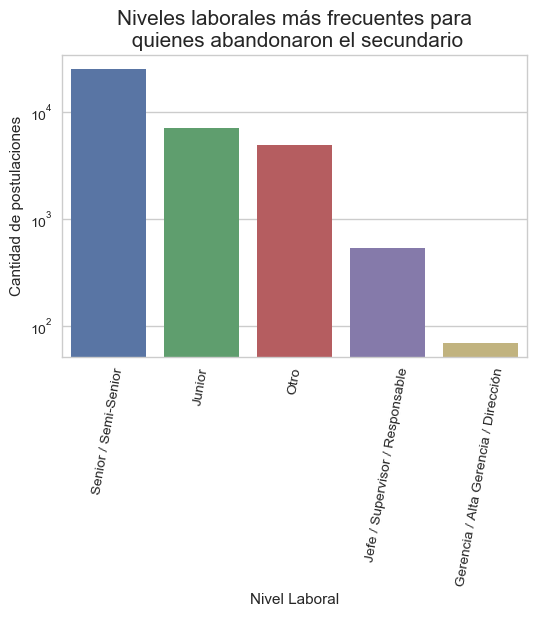

In [12]:
abandonoSec = pd.merge(abandonoSec, nivelAvisos,how = "inner")
abandonoSec.nivel_laboral.value_counts()
g = sns.countplot(x ="nivel_laboral" ,data = abandonoSec, order = abandonoSec.nivel_laboral.value_counts().head(10).index)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_xlabel("Nivel Laboral")
g.set_ylabel("Cantidad de postulaciones")
g.set_title("Niveles laborales más frecuentes para\n quienes abandonaron el secundario", fontsize=15)
g.set_yscale("log")
postulaciones.head()

In [13]:
#postulaciones = pd.read_csv("../Data/datos_navent_fiuba/fiuba_4_postulaciones.csv")
postulaciones = pd.merge(postulaciones,maxNivelEdCompletado, how="left")
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,nombre_area,nombre,estado,gradoMax,abandonoSec,nivelEd
0,1112257047,NM5M,2018-01-15 16:22:34,Atención al Cliente,Secundario,Graduado,1,False,Secundario
1,1111920714,NM5M,2018-02-06 09:04:50,Telemarketing,Secundario,Graduado,1,False,Secundario
2,1112346945,NM5M,2018-02-22 09:04:47,Telemarketing,Secundario,Graduado,1,False,Secundario
3,1112345547,NM5M,2018-02-22 09:04:59,Telemarketing,Secundario,Graduado,1,False,Secundario
4,1112237522,5awk,2018-01-25 18:55:03,Contabilidad,Universitario,Graduado,3,False,Universitario


Text(0.5,1,'Cantidad de avisos por area de trabajo')

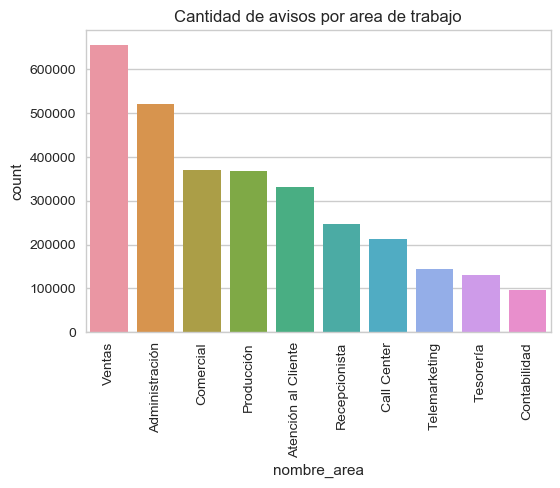

In [14]:
#veamos que areas son mas frecuentes para cada nivel educativo
#tomemos las 5 areas con mas postulaciones para cada nivel educativo
#postulaciones.groupby("nivelEd")["nombre_area"].value_counts().Universitario.head(5)
g = sns.countplot(x= "nombre_area",data = postulaciones, order = postulaciones.nombre_area.value_counts().head(10).index , orient='v')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title("Cantidad de avisos por area de trabajo")

In [15]:
print(postulaciones.nivelEd.unique())

def graficarAreassPorNivelEd(nivel,axis):
    #imprime las 10 areas mas frecuentes segun el nivel recibido por parametro
    postulacionesNivel = postulaciones[postulaciones["nivelEd"] == nivel]
    g = sns.countplot(x= "nombre_area",data = postulacionesNivel, order = postulacionesNivel.nombre_area.value_counts().head(10).index , orient='v', ax = ax[axis], palette="cubehelix")
    g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
    g.set_title("Áreas de postulaciones más \nfrecuentes para " + nivel, fontsize = 14)
    g.set_ylabel("Cantidad de postulaciones", fontsize = 14)
    g.set_xlabel("Área")
    g.set_yticklabels(g.get_yticklabels(), fontsize = 12)

['Secundario' 'Universitario' nan 'Terciario/Técnico' 'Master' 'Posgrado'
 'Otro' 'Doctorado']


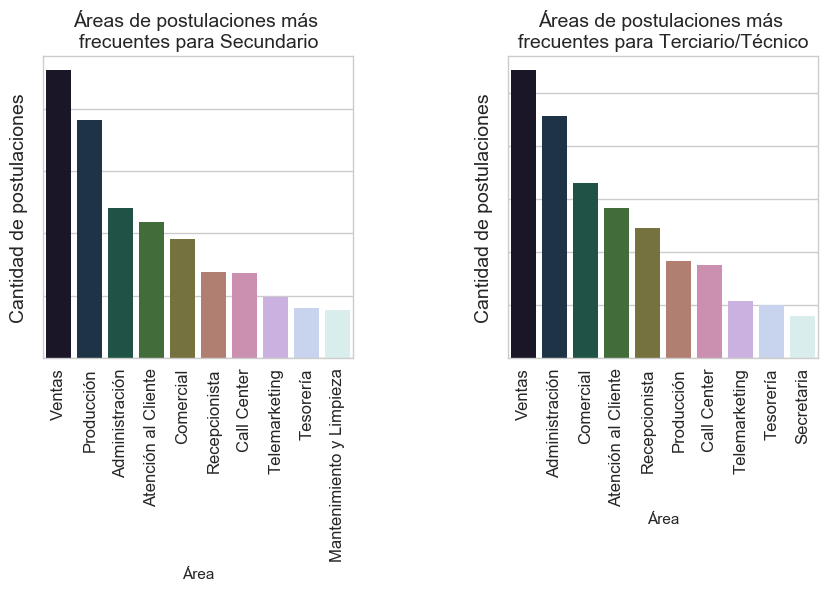

In [16]:
fig, ax = plt.subplots(1,2,figsize = (10,4))
fig.subplots_adjust(wspace =0.5)


graficarAreassPorNivelEd("Secundario",0)
graficarAreassPorNivelEd("Terciario/Técnico",1)



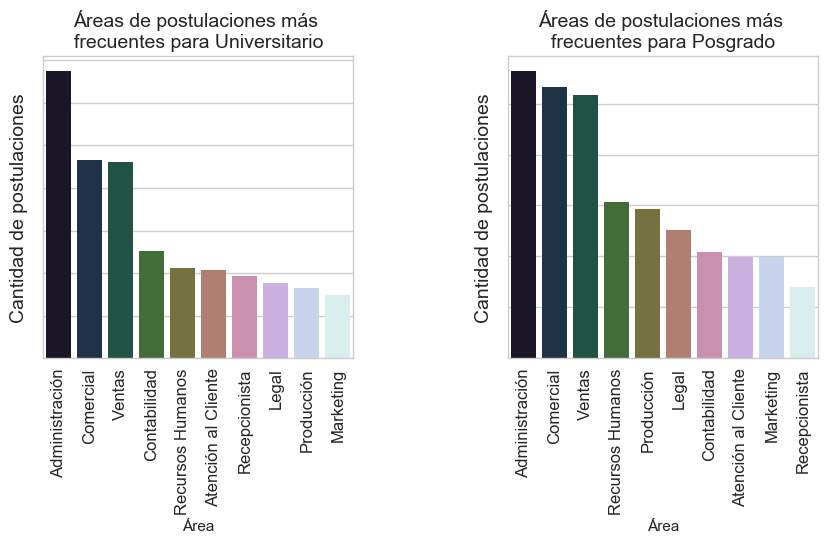

In [17]:
fig, ax = plt.subplots(1,2,figsize = (10,4))
fig.subplots_adjust(wspace =0.5)
graficarAreassPorNivelEd("Universitario",0)
graficarAreassPorNivelEd("Posgrado",1)


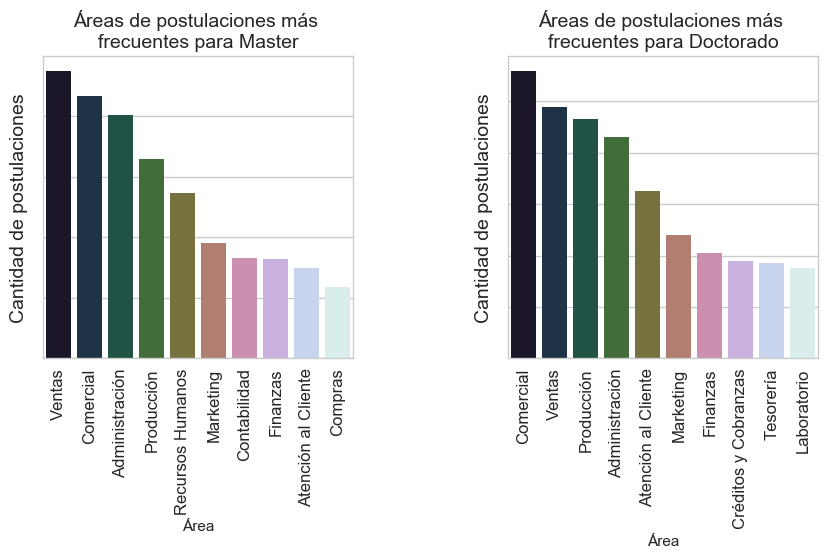

In [18]:
fig, ax = plt.subplots(1,2,figsize = (10,4))
fig.subplots_adjust(wspace =0.5)
graficarAreassPorNivelEd("Master",0)
graficarAreassPorNivelEd("Doctorado",1)


In [19]:
#notamos que las areas de Administracion, comercial y ventas tienen postulaciones apmpliamnete mayores a las otras
#Veamos como es ahora el grafico sin ellas:

postulaciones = postulaciones[(postulaciones["nombre_area"] != "Administración") & (postulaciones["nombre_area"] != "Ventas")&(postulaciones["nombre_area"] != "Comercial") ]

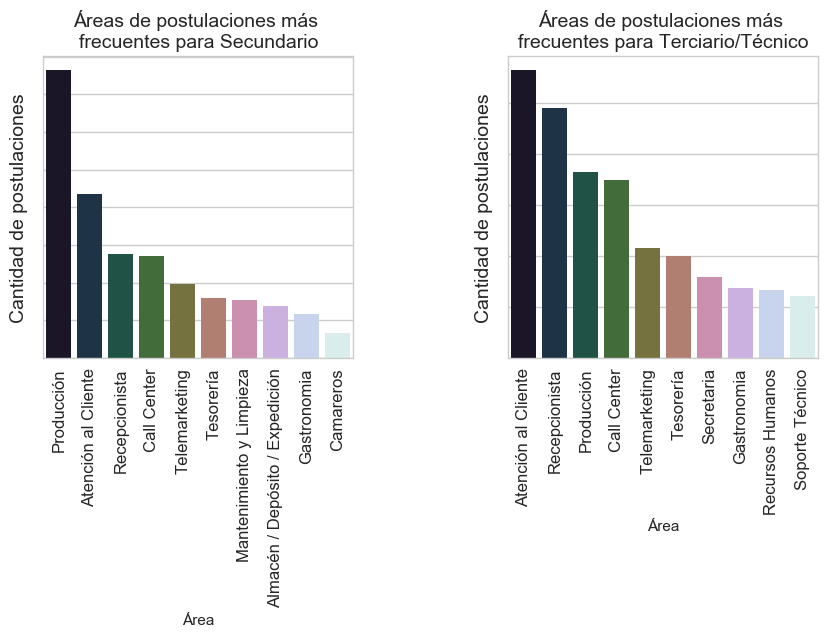

In [20]:
fig, ax = plt.subplots(1,2,figsize = (10,4))
fig.subplots_adjust(wspace =0.5)

graficarAreassPorNivelEd("Secundario",0)
graficarAreassPorNivelEd("Terciario/Técnico",1)

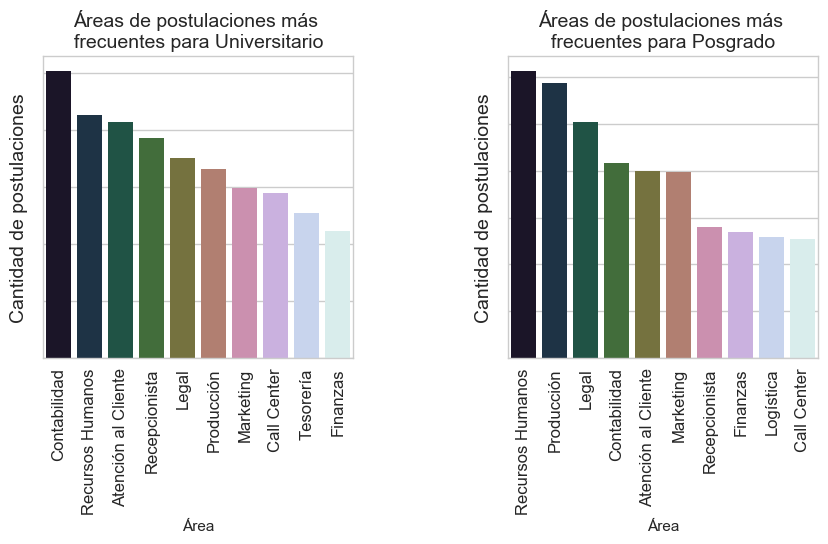

In [21]:
fig, ax = plt.subplots(1,2,figsize = (10,4))
fig.subplots_adjust(wspace =0.5)
graficarAreassPorNivelEd("Universitario",0)
graficarAreassPorNivelEd("Posgrado",1)


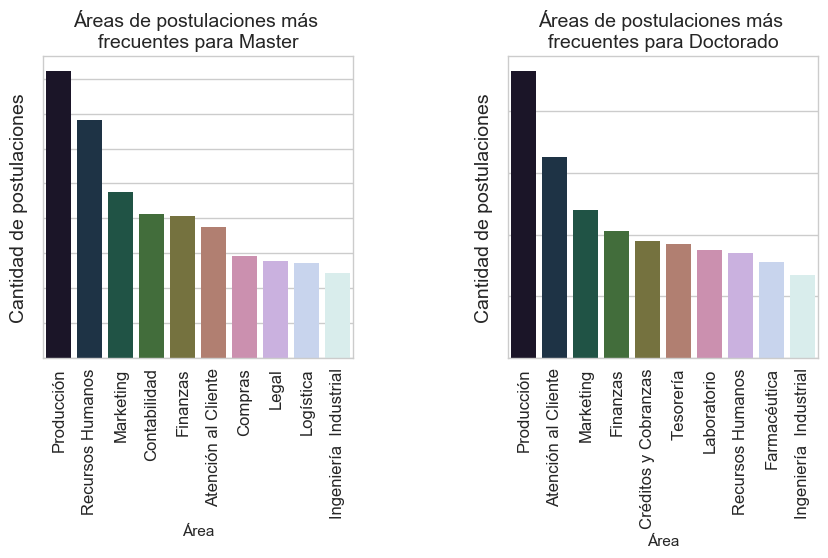

In [22]:
fig, ax = plt.subplots(1,2,figsize = (10,4))
fig.subplots_adjust(wspace =0.5)
graficarAreassPorNivelEd("Master",0)
graficarAreassPorNivelEd("Doctorado",1)

Text(0.5,1,'Cantidad de avisos por nivel laboral')

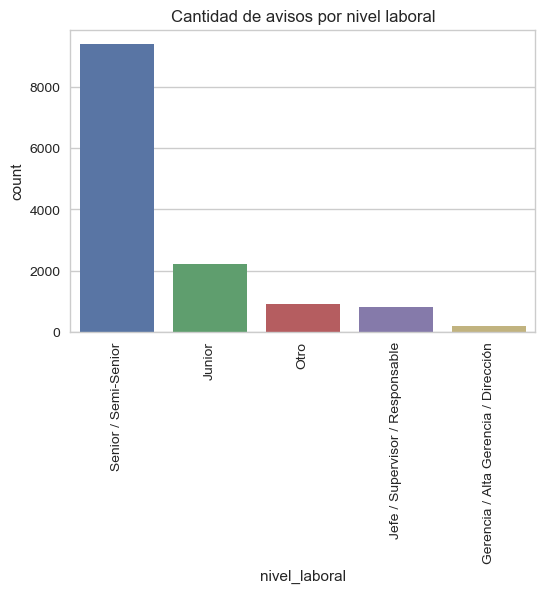

In [23]:
#Analicemos ahora los niveles laborales a los que se postula un postulante con cierto nivel educativo
avisos.head()
avisos.nivel_laboral.unique()

lvlMap = {
    "Otro": 0,
    "Junior": 1,
    "Senior / Semi-Senior": 2,
    "Jefe / Supervisor / Responsable": 3,
    "Gerencia / Alta Gerencia / Dirección": 4
}

avisos["nivel_num"] = avisos["nivel_laboral"].map(lvlMap)
avisos.head()
#g = sns.countplot(x = "")
avisos = avisos.loc[:,["idaviso","nivel_laboral", "nivel_num"]]

g = sns.countplot( x = "nivel_laboral", data = avisos, order = avisos.nivel_laboral.value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title("Cantidad de avisos por nivel laboral")


In [24]:
postulaciones = pd.merge(postulaciones,avisos)
nivelAvisos = "";
postulaciones.head()
postulaciones = postulaciones[postulaciones["nivelEd"] != "Otro"]


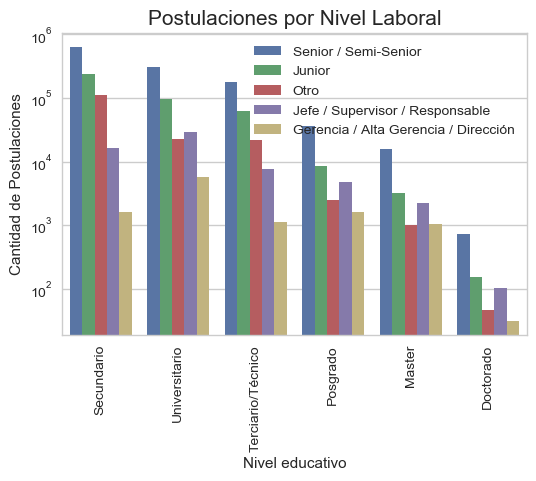

In [25]:
g = sns.countplot( hue = "nivel_laboral",x = "nivelEd", data = postulaciones, order = postulaciones.nivelEd.value_counts().index,hue_order = postulaciones.nivel_laboral.value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_ylabel("Cantidad de Postulaciones")
g.set_xlabel("Nivel educativo")
g.set_title("Postulaciones por Nivel Laboral", fontsize=15)
g.set_yscale("log")
g.legend()

In [26]:
#postulaciones = postulaciones.drop("nivel_num", axis = 1)
postulaciones = postulaciones.dropna()
postulaciones.head()


#Generamos un DF con la informacion de las edades
edades = pd.read_csv("../Data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv")

eades = edades.drop("sexo", axis = 1)
edades["fechanacimiento"] = pd.to_datetime(edades["fechanacimiento"],errors = 'coerce')
edades = edades.dropna()
today = pd.to_datetime(pd.Timestamp.today())

def timedelta(start):
    return  pd.Timedelta(today - start).days
    

edades["edadDias"] = edades["fechanacimiento"].map(timedelta)

#edades.dropna()
#edades
edades["edad"] = (edades["edadDias"]/365)

#edades.drop(["fechanacimiento", "sexo"], axis = 1)
#edades.dropna()
#edades["edadDias"].isna().value_counts()

edades["fechanacimiento"].isna().value_counts()
edades.edad = edades.edad.astype(int)
edades.edad
edades.edad.isna().value_counts()

False    196131
Name: edad, dtype: int64

In [27]:
postulaciones = pd.merge(postulaciones,edades[["idpostulante","edadDias","edad"]], how = "inner")
postulaciones.head(10)

,idaviso,idpostulante,fechapostulacion,nombre_area,nombre,estado,gradoMax,abandonoSec,nivelEd,nivel_laboral,nivel_num,edadDias,edad
0,1112257047,NM5M,2018-01-15 16:22:34,Atención al Cliente,Secundario,Graduado,1,False,Secundario,Otro,0,17301,47
1,1111920714,NM5M,2018-02-06 09:04:50,Telemarketing,Secundario,Graduado,1,False,Secundario,Senior / Semi-Senior,2,17301,47
2,1112346945,NM5M,2018-02-22 09:04:47,Telemarketing,Secundario,Graduado,1,False,Secundario,Senior / Semi-Senior,2,17301,47
3,1112345547,NM5M,2018-02-22 09:04:59,Telemarketing,Secundario,Graduado,1,False,Secundario,Senior / Semi-Senior,2,17301,47
4,1112257047,1kJqGb,2018-01-15 10:23:11,Atención al Cliente,Terciario/Técnico,Graduado,2,False,Terciario/Técnico,Otro,0,12413,34
5,1112262494,1kJqGb,2018-01-17 15:02:40,Atención al Cliente,Terciario/Técnico,Graduado,2,False,Terciario/Técnico,Senior / Semi-Senior,2,12413,34
6,1112262197,1kJqGb,2018-01-17 15:02:12,Atención al Cliente,Terciario/Técnico,Graduado,2,False,Terciario/Técnico,Senior / Semi-Senior,2,12413,34
7,1111790454,1kJqGb,2018-01-15 10:20:29,Atención al Cliente,Terciario/Técnico,Graduado,2,False,Terciario/Técnico,Senior / Semi-Senior,2,12413,34
8,1112245960,1kJqGb,2018-01-21 19:51:10,Call Center,Terciario/Técnico,Graduado,2,False,Terciario/Técnico,Senior / Semi-Senior,2,12413,34
9,1112245073,1kJqGb,2018-01-17 15:03:04,Atención al Cliente,Terciario/Técnico,Graduado,2,False,Terciario/Técnico,Senior / Semi-Senior,2,12413,34


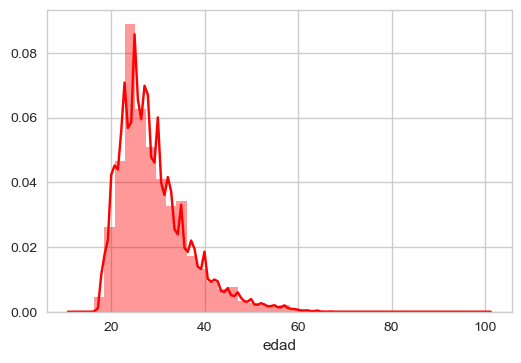

In [28]:
#Analicemos ahora la educación de los postulantes según su edad. También analizaremos los niveles y areas de los anuncios
#a los que se postulan grupos de interes como los estudiantes universitarios, veremos a que trabajos se postulan
#aquellos que solo se graduaron de la secundaria en distintas edades. Veremos la edad promedio a la que se postulan los candidatos
#para cada nivel y area laboral

postEdLvl = postulaciones[postulaciones["nivelEd"] == "Secundario"]
postEdLvl = postulaciones["edad"]
sns.distplot(postEdLvl, bins=40, color = "red")



1    115998
2     31079
3      4808
4       437
5        28
6         1
Name: cant_titulos, dtype: int64


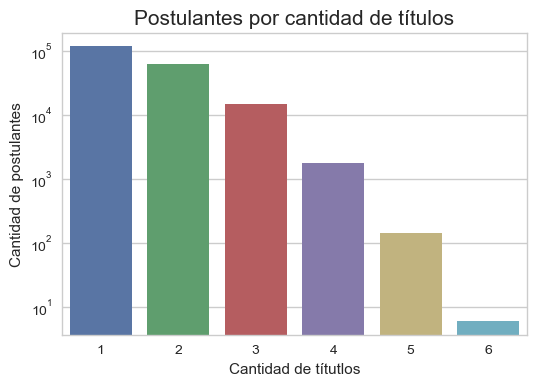

In [29]:
nivelEd = pd.read_csv("../Data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
nivelEd = nivelEd[nivelEd["estado"] == "Graduado"]
cant_titulos = nivelEd.groupby("idpostulante").agg({"nombre":"count"})
cant_titulos = cant_titulos.reset_index()
cant_titulos.head(10)
cant_titulos.rename({"nombre":"cant_titulos"}, axis=1, inplace=True)
print(cant_titulos.cant_titulos.value_counts())
cant_titulos = pd.merge(cant_titulos, nivelEd, on="idpostulante", how="left")

g = sns.countplot(cant_titulos.cant_titulos)
#cant_titulos.cant_titulos.value_counts()
g.set_ylabel("Cantidad de postulantes")
g.set_xlabel("Cantidad de títutlos")
g.set_title("Postulantes por cantidad de títulos", fontsize=15)
g.set_yscale("log")


In [30]:
#cant_titulos = cant_titulos.drop(["nombre", "estado"], axis = 1)
cant_titulos.head()

promedio_titulos = cant_titulos.cant_titulos.mean()
promedio_titulos
postulaciones = pd.merge(postulaciones,cant_titulos,on="idpostulante", how= "left")
postulaciones.dropna()
postulaciones = postulaciones.drop(["fechapostulacion","nombre_x", "estado_x", "nivel_num", "nombre_y", "estado_y"], axis = 1)
postulaciones.head()

,idaviso,idpostulante,nombre_area,gradoMax,abandonoSec,nivelEd,nivel_laboral,edadDias,edad,cant_titulos
0,1112257047,NM5M,Atención al Cliente,1,False,Secundario,Otro,17301,47,1
1,1111920714,NM5M,Telemarketing,1,False,Secundario,Senior / Semi-Senior,17301,47,1
2,1112346945,NM5M,Telemarketing,1,False,Secundario,Senior / Semi-Senior,17301,47,1
3,1112345547,NM5M,Telemarketing,1,False,Secundario,Senior / Semi-Senior,17301,47,1
4,1112257047,1kJqGb,Atención al Cliente,2,False,Terciario/Técnico,Otro,12413,34,1


Text(0.5,0,'Nivel Laboral')

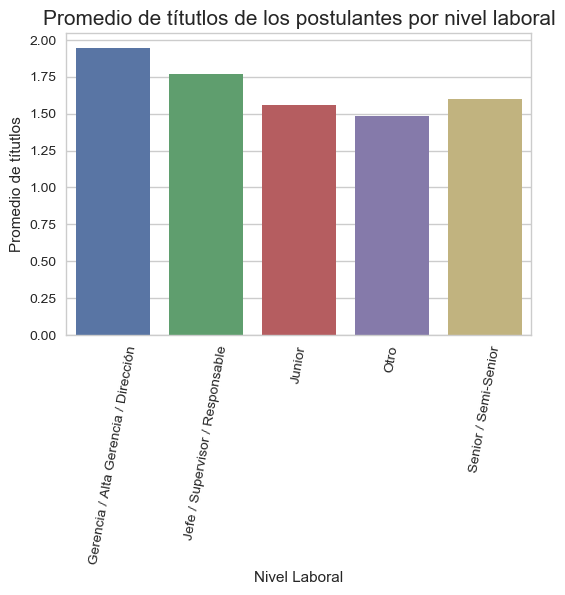

In [31]:
titulos_por_nivel = postulaciones.groupby("nivel_laboral").agg({"cant_titulos": "mean"})
titulos_por_nivel = titulos_por_nivel.reset_index()
g = sns.barplot(titulos_por_nivel.nivel_laboral,titulos_por_nivel.cant_titulos)
g.set_xticklabels(g.get_xticklabels(),rotation = 80)
g.set_title("Promedio de títutlos de los postulantes por nivel laboral", fontsize=15)
g.set_ylabel("Promedio de títutlos")
g.set_xlabel("Nivel Laboral")

Text(0.5,0,'Área')

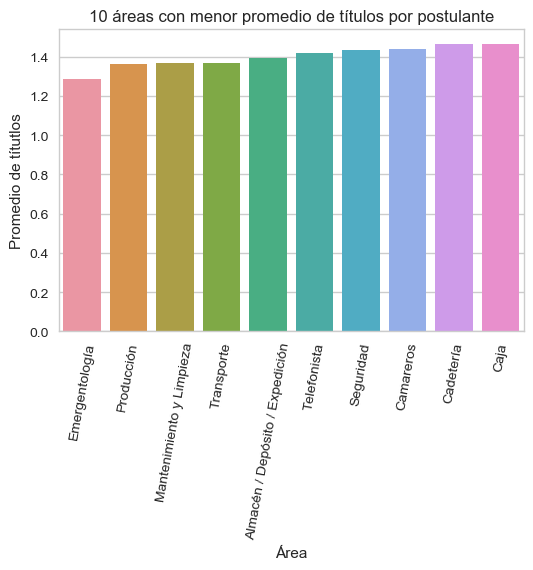

In [35]:
titulos_por_area = postulaciones.groupby("nombre_area").agg({"cant_titulos": "mean"})
titulos_por_area = titulos_por_area.reset_index().sort_values("cant_titulos", ascending = True)
g = sns.barplot(titulos_por_area.nombre_area.head(10),titulos_por_area.cant_titulos.head(10))
g.set_xticklabels(g.get_xticklabels(),rotation = 80)
g.set_title("10 áreas con menor promedio de títulos por postulante")
g.set_ylabel("Promedio de títutlos")
g.set_xlabel("Área")

Text(0.5,0,'Área')

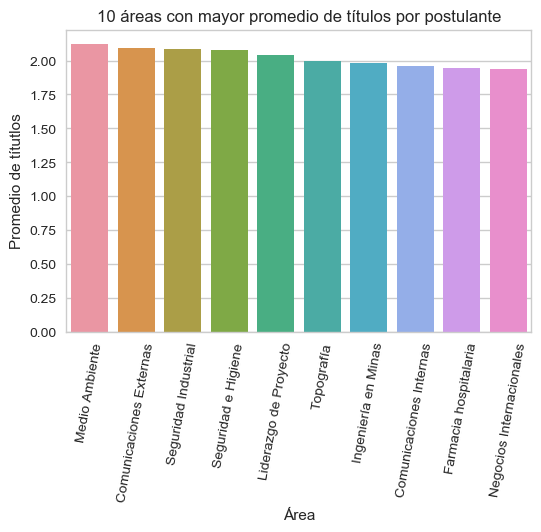

In [37]:
titulos_por_area = postulaciones.groupby("nombre_area").agg({"cant_titulos": "mean"})
titulos_por_area = titulos_por_area.reset_index().sort_values("cant_titulos", ascending = False)
g = sns.barplot(titulos_por_area.nombre_area.head(10),titulos_por_area.cant_titulos.head(10))
g.set_xticklabels(g.get_xticklabels(),rotation = 80)
g.set_title("10 áreas con mayor promedio de títulos por postulante")
g.set_ylabel("Promedio de títutlos")
g.set_xlabel("Área")